In [1]:
# We will be learning how to train Linear regressions and how to minimize the loss function with MSE

In [2]:
# page 135 
## Generating some linear-looking data to test this equation on figure 4-1

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100 # Number of instances
X = 2 * np.random.rand(m,1) # Column vector
y= 4 + 3 * X + np.random.randn(m, 1) # Column vector

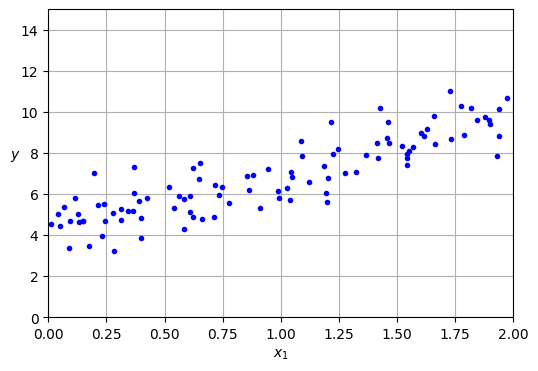

In [3]:
# Plot X and y 
plt.figure(figsize=(6,4))
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0 , 15])
plt.grid()
plt.show()

In [4]:
# Now let's compute 0Hat using the normal equation

from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x) = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
## We wanted to see the values eaquat to 4 and 3 but it is close enough.


In [7]:
# Let's make a prediction using what we have so far
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # Add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

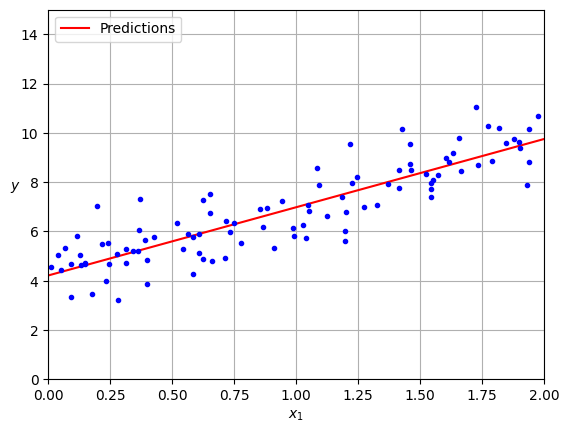

In [8]:
# let's plot the models predictions
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [9]:
## Performing linear reression using Scikit learn page 137
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [11]:
# Batch Gradient Descent Page 143
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2,1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [12]:
# Each iteration over the training set is called an epoch
theta

array([[4.21509616],
       [2.77011339]])

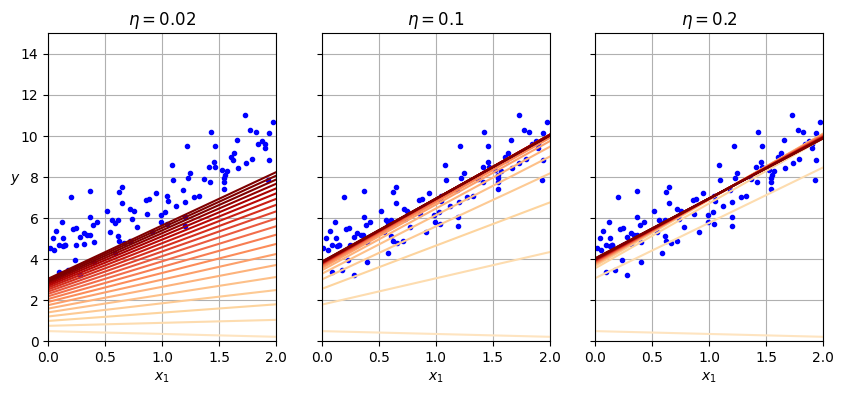

In [13]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.2)
plt.show()

In [14]:
# Learning Schedule Page 146
n_epochs = 50 
t0, t1 = 5, 50 # Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1) #Random initialization

np.random.seed(42)
theta = np.random.randn(2, 1) # Random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [15]:
theta

array([[4.21076011],
       [2.74856079]])

In [16]:
# Creating a SGD REgressor page 147
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() becasue fit() expects 1d targts

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [18]:
## Polynomial regression

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

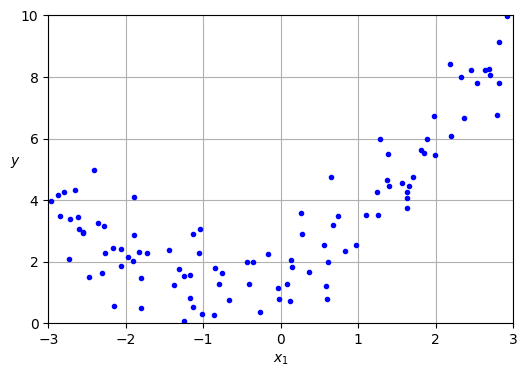

In [19]:
# Plot the polynomial
plt.figure(figsize=(6,4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_feautres = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feautres.fit_transform(X)
X[0]

array([-0.75275929])

In [21]:
X_poly[0]

array([-0.75275929,  0.56664654])

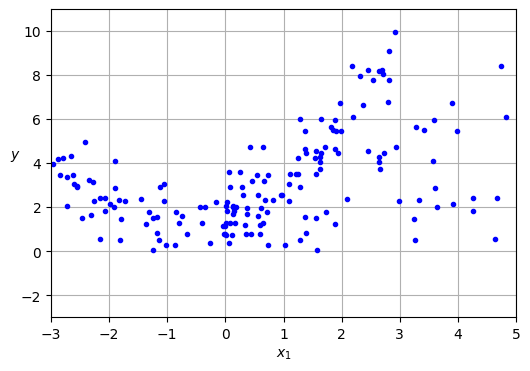

In [22]:
# Plot the polynomial
plt.figure(figsize=(6,4))
plt.plot(X_poly, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 5, -3, 11])
plt.grid()
plt.show()

In [23]:
# Now that the X_poly contains the squared values of x we can not use a linear regression model 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

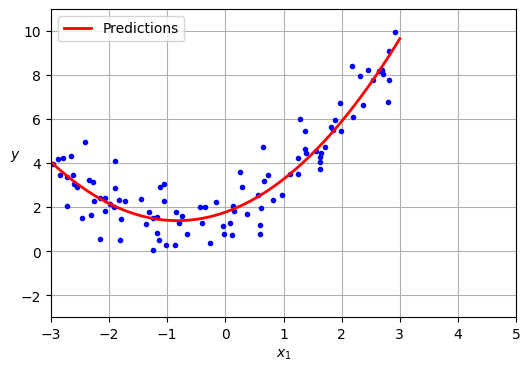

In [24]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feautres.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 5, -3, 11])
plt.grid()
plt.show()

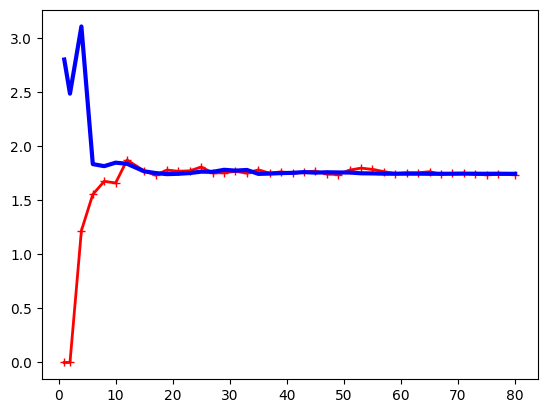

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_score, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, 
    scoring="neg_root_mean_squared_error")
train_errors = -train_score.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

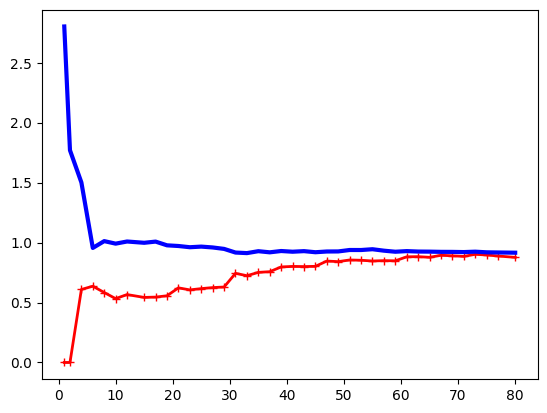

In [26]:
train_sizes, train_score, valid_scores = learning_curve(
    LinearRegression(), X_poly, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, 
    scoring="neg_root_mean_squared_error")
train_errors = -train_score.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.show()

(0.0, 80.0, 0.0, 2.5)

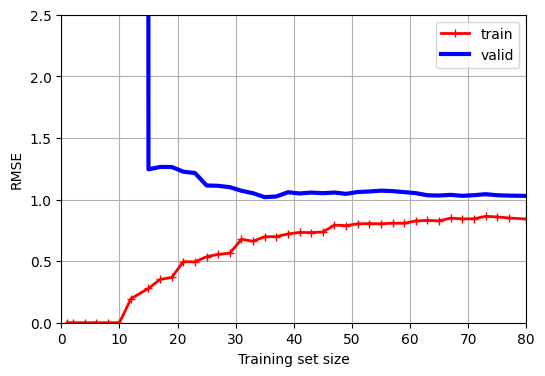

In [27]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

# extra code – generates and saves Figure 4–16

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])


## Ridge regression

In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [33]:
# And using stochastic gradient descent 
sge_reg = SGDRegressor(penalty='l2', alpha=0.1 / m, tol= None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() becasue fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([4.83349631])

In [31]:
# Lets make a lasso regression model
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X, y )
lasso_reg.predict([[1.5]])

array([4.82412349])

## Logistics regression
### Decision Boundaries

In [34]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [36]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [41]:
# Now we will split the data 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

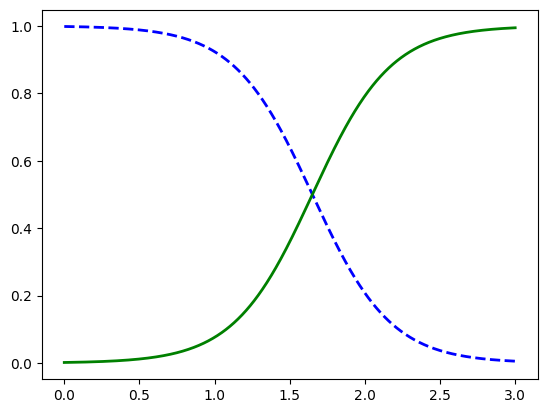

In [45]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decsion_boundary = X_new[y_proba[:, 1] >= 0.5][0,0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
